In [12]:
# just importing a random selection of things; we can fix this later
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.grid_search import GridSearchCV

from pprint import pprint 

from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from random import seed
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import RandomForestClassifier
from itertools import product
from collections import OrderedDict
from itertools import product

from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from __future__ import print_function # For Python 2 / 3 compatability
from sklearn.metrics import confusion_matrix
import itertools

import json
from copy import copy

import warnings
from sklearn import preprocessing
%autosave 300
warnings.filterwarnings("ignore")

Autosaving every 300 seconds


In [13]:
#### ADNI2 within ADNIMERGE (no additional predictors yet)
print('BASELINE')
ADNI2_remove_train = pd.read_csv('ADNI2_bl_remove_train.csv')
print("ADNI2 remove train shape: ", ADNI2_remove_train.shape)

ADNI2_remove_test= pd.read_csv('ADNI2_bl_remove_test.csv')
print("ADNI2 remove test shape: ", ADNI2_remove_test.shape)
print('\n')

ADNI2_model_train = pd.read_csv('ADNI2_bl_model_train.csv')
print("ADNI2 impute model train shape: ", ADNI2_model_train.shape)

ADNI2_model_test = pd.read_csv('ADNI2_bl_model_test.csv')
print("ADNI2 impute model shape: ", ADNI2_model_test.shape)
print('\n')

ADNI2_mean_train = pd.read_csv('ADNI2_bl_mean_train.csv')
print("ADNI2 impute mean train shape: ", ADNI2_mean_train.shape)


ADNI2_mean_test = pd.read_csv('ADNI2_bl_mean_test.csv')
print("ADNI2 impute mean test shape: ", ADNI2_mean_test.shape)
print('//////////')
print('\n')

ADNI2_bl = pd.read_csv('ADNI2_bl.csv')
ADNI2_bl_expand = pd.read_csv('ADNI2_bl_expand.csv')



BASELINE
ADNI2 remove train shape:  (360, 54)
ADNI2 remove test shape:  (137, 54)


ADNI2 impute model train shape:  (565, 54)
ADNI2 impute model shape:  (194, 54)


ADNI2 impute mean train shape:  (565, 54)
ADNI2 impute mean test shape:  (194, 54)
//////////




In [14]:

print(ADNI2_remove_train.shape)
ADNI2_bl_mean = pd.concat([ADNI2_mean_train, ADNI2_mean_test])
ADNI2_bl_remove = pd.concat([ADNI2_remove_train, ADNI2_remove_test])
ADNI2_bl_model = pd.concat([ADNI2_model_train, ADNI2_model_test])
print(ADNI2_bl_mean.shape)


(360, 54)
(759, 54)


# EDA

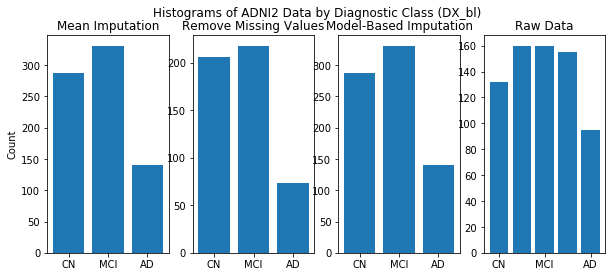

In [4]:
# visualize the number in each class
fig, ax = plt.subplots(1,4,figsize=(10,4))

l = ADNI2_bl_mean.groupby("DX_bl")["DX_bl"].count().tolist()
ax[0].bar([i for i in range(len(l))], l)
ax[0].set_title("Mean Imputation")
ax[0].set_xticklabels(['','CN','MCI', 'AD'])
ax[0].set_ylabel('Count')

m = ADNI2_bl_remove.groupby("DX_bl")["DX_bl"].count().tolist()
ax[1].bar([i for i in range(len(m))], m)
ax[1].set_title("Remove Missing Values")
ax[1].set_xticklabels(['','CN','MCI', 'AD'])

n = ADNI2_bl_model.groupby("DX_bl")["DX_bl"].count().tolist()
ax[2].bar([i for i in range(len(n))], n)
ax[2].set_title("Model-Based Imputation")
ax[2].set_xticklabels(['','CN','MCI', 'AD'])

p = ADNI2_bl.groupby("DX_bl")["DX_bl"].count().tolist()
ax[3].bar([i for i in range(len(p))], p)
ax[3].set_title("Raw Data")
ax[3].set_xticklabels(['','CN','MCI', 'AD'])

plt.suptitle('Histograms of ADNI2 Data by Diagnostic Class (DX_bl)')
# plt.tight_layout()
plt.show()

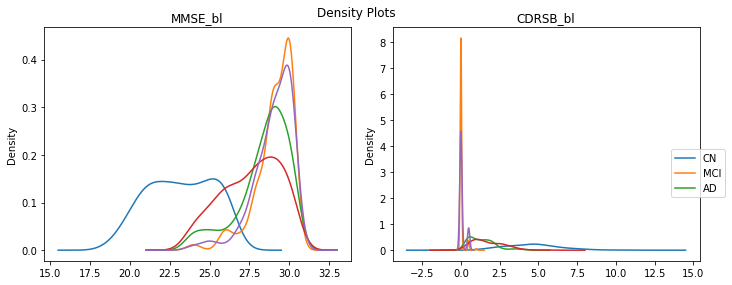

In [5]:
# density plots for CDRSB_bl and MMSE_bl
# using data without processing of missing values

from scipy.stats import gaussian_kde
fig, ax = plt.subplots(1,2,figsize=(10,4))
plt.suptitle('Density Plots')
ADNI2_bl.groupby("DX_bl").MMSE_bl.plot.kde(ax = ax[0])
ax[0].set_title('MMSE_bl')
ADNI2_bl.groupby("DX_bl").CDRSB_bl.plot.kde(ax = ax[1])
ax[1].set_title('CDRSB_bl')
plt.tight_layout()
plt.legend(['CN', 'MCI', 'AD'], bbox_to_anchor=(1.1, 0.5))
plt.show()

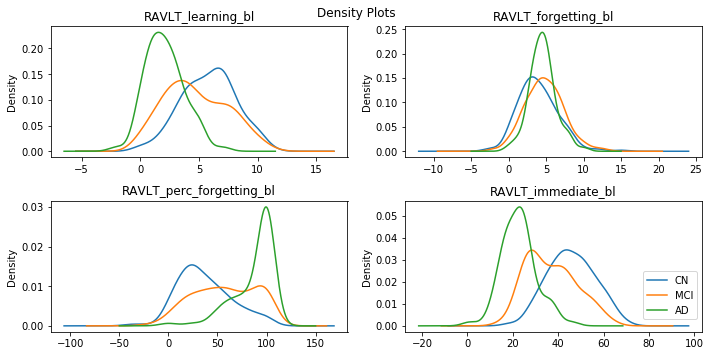

In [6]:
# density plots for RAVLT predictors

    # RAVLT_learning_bl
    # RAVLT_forgetting_bl
    # RAVLT_perc_forgetting_bl
    # RAVLT_immediate_bl

from scipy.stats import gaussian_kde
fig, ax = plt.subplots(2,2,figsize=(10,5))
plt.suptitle('Density Plots')
ADNI2_bl_remove.groupby("DX_bl").RAVLT_learning_bl.plot.kde(ax = ax[0,0])
ax[0,0].set_title('RAVLT_learning_bl')
ADNI2_bl_remove.groupby("DX_bl").RAVLT_forgetting_bl.plot.kde(ax = ax[0,1])
ax[0,1].set_title('RAVLT_forgetting_bl')
ADNI2_bl_remove.groupby("DX_bl").RAVLT_perc_forgetting_bl.plot.kde(ax = ax[1,0])
ax[1,0].set_title('RAVLT_perc_forgetting_bl')
ADNI2_bl_remove.groupby("DX_bl").RAVLT_immediate_bl.plot.kde(ax = ax[1,1])
ax[1,1].set_title('RAVLT_immediate_bl')
plt.tight_layout()
plt.legend(['CN', 'MCI', 'AD'], bbox_to_anchor=(1, 0.5))
plt.show()

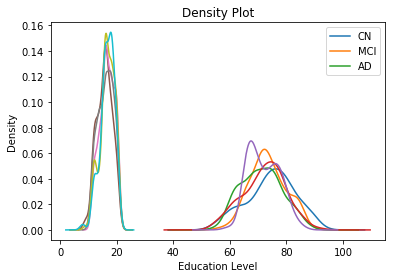

In [7]:
ADNI2_bl.groupby("DX_bl").AGE.plot(kind='kde')

plt.legend(['CN', 'MCI', 'AD' ])
plt.xlabel('Age')
plt.title('Density Plot')

ADNI2_bl.groupby("DX_bl").PTEDUCAT.plot(kind='kde')

plt.legend(['CN', 'MCI', 'AD' ])
plt.title('Density Plot')
plt.xlabel('Education Level')
plt.show()
plt.show()

## Covariance matrices

Covariance matrix heatmap of a list of predictors of interest


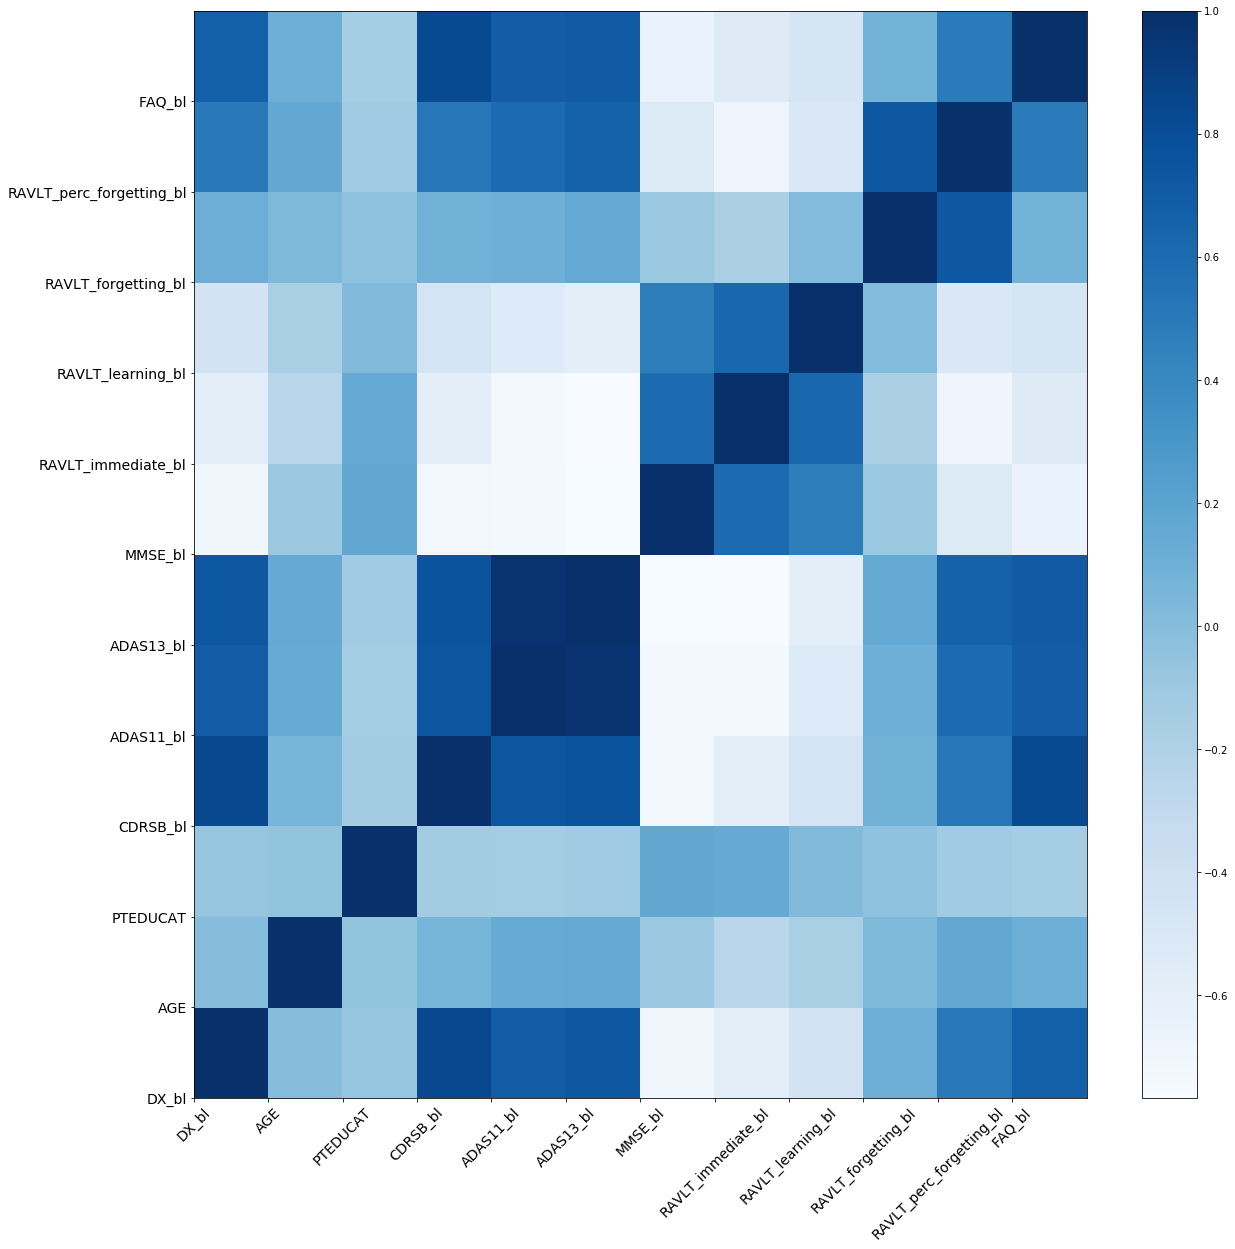

In [8]:
# for ADNI2 before processing missing values


ADNI2_bl_eda = ADNI2_bl_remove.copy()
'''
All columns:
'DX_bl', 'AGE', 'PTEDUCAT', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl',
       'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl',
       'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
       'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'MOCA_bl', 'EcogPtMem_bl',
       'EcogPtLang_bl', 'EcogPtVisspat_bl', 'EcogPtPlan_bl',
       'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl',
       'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPVisspat_bl',
       'EcogSPPlan_bl', 'EcogSPOrgan_bl', 'EcogSPDivatt_bl',
       'EcogSPTotal_bl', 'FDG_bl', 'AV45_bl', 'PTETHCAT_Hisp/Latino',
       'PTETHCAT_Not Hisp/Latino', 'PTRACCAT_Am Indian/Alaskan',
       'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
       'PTRACCAT_More than one', 'PTRACCAT_White', 'PTMARRY_Divorced',
       'PTMARRY_Married', 'PTMARRY_Never married', 'PTMARRY_Widowed',
       'APOE4_0.0', 'APOE4_1.0', 'APOE4_2.0', 'PTGENDER_Female',
       'PTGENDER_Male', 'FLDSTRENG_bl_3 Tesla MRI',
       'FSVERSION_bl_Cross-Sectional FreeSurfer (5.1)'

'''

# L: a list of predictors of interest
L = ['DX_bl', 'AGE',  'PTEDUCAT', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl',
       'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl']

print("Covariance matrix heatmap of a list of predictors of interest")
cm = np.corrcoef(np.transpose(ADNI2_bl_eda[L].values.tolist()) )
x_pos = np.arange(len(L))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
heatmap = ax.pcolor(cm, cmap=plt.cm.Blues)#, alpha=0.8)
ax.set_xticks(x_pos)
ax.set_yticks(x_pos)
ax.set_xticklabels(L, size=14)
ax.set_yticklabels(L, size=14)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.colorbar(heatmap)
plt.show()

Covariance matrix heatmap of a list of predictors of interest


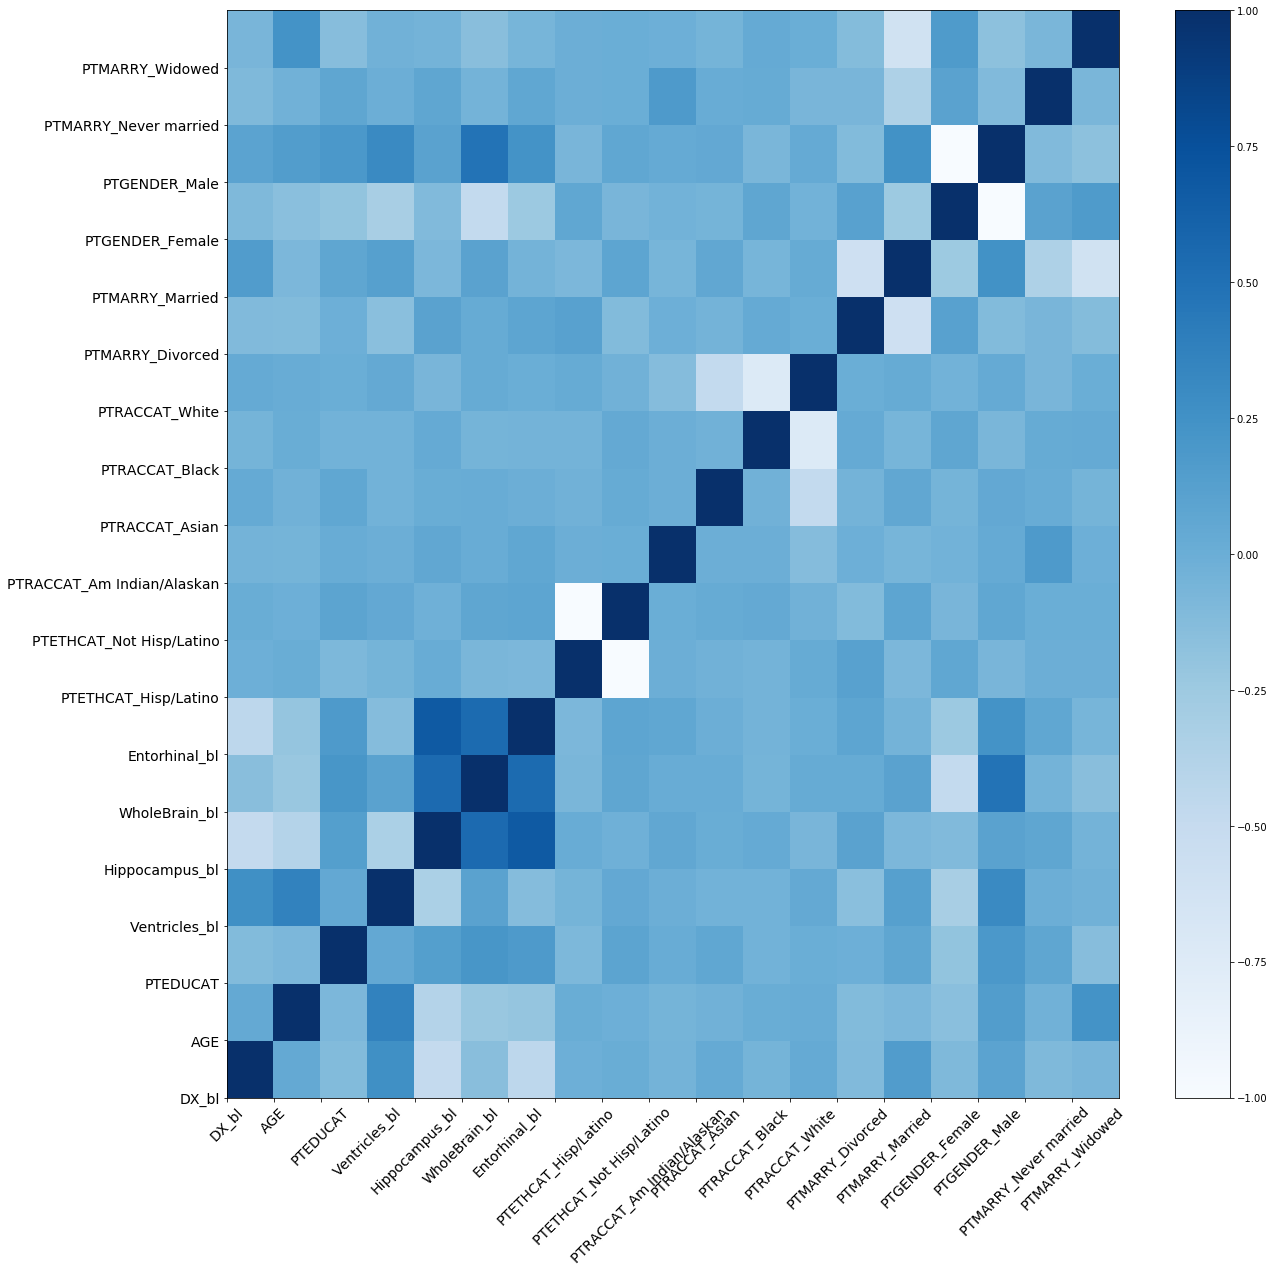

In [9]:
# for ADNI2 after model-based imputing missing values
ADNI2_bl_model_eda = ADNI2_bl_model.copy()

'''
All columns:
'DX_bl', 'AGE', 'PTEDUCAT', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl',
       'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl',
       'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
       'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'MOCA_bl', 'EcogPtMem_bl',
       'EcogPtLang_bl', 'EcogPtVisspat_bl', 'EcogPtPlan_bl', 'EcogPtOrgan_bl',
       'EcogPtDivatt_bl', 'EcogPtTotal_bl', 'EcogSPMem_bl', 'EcogSPLang_bl',
       'EcogSPVisspat_bl', 'EcogSPPlan_bl', 'EcogSPOrgan_bl',
       'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl', 'AV45_bl', 'ABETA',
       'TAU', 'PTAU', 'PTETHCAT_Hisp/Latino', 'PTETHCAT_Not Hisp/Latino',
       'PTRACCAT_Am Indian/Alaskan', 'PTRACCAT_Asian', 'PTRACCAT_Black',
       'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one',
       'PTRACCAT_White', 'PTMARRY_Divorced', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Widowed', 'APOE4_0.0', 'APOE4_1.0',
       'APOE4_2.0', 'PTGENDER_Female', 'PTGENDER_Male',
       'FLDSTRENG_bl_3 Tesla MRI',
       'FSVERSION_bl_Cross-Sectional FreeSurfer (5.1)', 'ANY CHOL_0',
       'ANY CHOL_1', 'CALCIUM_0', 'CALCIUM_1', 'ANY BT_0', 'ANY BT_1',
       'VITAMIN D merge_0', 'VITAMIN D merge_1'

'''

# L: a list of predictors of interest
L = ['DX_bl', 'AGE', 'PTEDUCAT',
       'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
#        'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'MOCA_bl', 'EcogPtMem_bl',
#        'EcogPtLang_bl', 'EcogPtVisspat_bl', 'EcogPtPlan_bl', 'EcogPtOrgan_bl',
#        'EcogPtDivatt_bl', 'EcogPtTotal_bl', 'EcogSPMem_bl', 'EcogSPLang_bl',
#        'EcogSPVisspat_bl', 'EcogSPPlan_bl', 'EcogSPOrgan_bl',
#        'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl', 'AV45_bl', 
       'PTETHCAT_Hisp/Latino', 'PTETHCAT_Not Hisp/Latino',
       'PTRACCAT_Am Indian/Alaskan', 'PTRACCAT_Asian', 'PTRACCAT_Black',
#        'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one',
       'PTRACCAT_White', 'PTMARRY_Divorced', 'PTMARRY_Married','PTGENDER_Female', 'PTGENDER_Male',
       'PTMARRY_Never married', 'PTMARRY_Widowed']
#      'APOE4_0.0', 'APOE4_1.0',
#        'APOE4_2.0', 
#        


# 
print("Covariance matrix heatmap of a list of predictors of interest")
cm = np.corrcoef(np.transpose(ADNI2_bl_model_eda[L].values.tolist()) )
#cm = np.corrcoef(np.transpose(ADNI2_bl_expand[ ["DX_bl", "AGE"] ].values.tolist()) )
x_pos = np.arange(len(L))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
heatmap = ax.pcolor(cm, cmap=plt.cm.Blues)#, alpha=0.8)
ax.set_xticks(x_pos)
ax.set_yticks(x_pos)
ax.set_xticklabels(L, size=14)
ax.set_yticklabels(L, size=14)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.colorbar(heatmap)
plt.show()

In [10]:
ADNI2_bl_model_eda.columns

Index(['AGE', 'PTEDUCAT', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl',
       'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl',
       'RAVLT_perc_forgetting_bl', 'FAQ_bl', 'Ventricles_bl', 'Hippocampus_bl',
       'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl',
       'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl',
       'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl',
       'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl',
       'EcogSPOrgan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl',
       'AV45_bl', 'PTETHCAT_Hisp/Latino', 'PTETHCAT_Not Hisp/Latino',
       'PTRACCAT_Am Indian/Alaskan', 'PTRACCAT_Asian', 'PTRACCAT_Black',
       'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one',
       'PTRACCAT_White', 'PTMARRY_Divorced', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Widowed', 'APOE4_0.0', 'APOE4_1.0',
       'APOE4_2.0', 'PTGENDER_Female', 'PTGEND

In [11]:
# NEW PREDICTORS - ADNI2 after model-based imputing missing values

ADNI2_bl_model_eda['TAU'] = ADNI2_bl_model_eda['TAU'].convert_objects(convert_numeric=True) #  'PTAU', 'ABETA'
ADNI2_bl_model_eda['PTAU'] = ADNI2_bl_model_eda['PTAU'].convert_objects(convert_numeric=True)
ADNI2_bl_model_eda['ABETA'] =ADNI2_bl_model_eda['ABETA'].convert_objects(convert_numeric=True)
     
L = [ 'DX_bl', 'AGE', 'ANY CHOL_0', 'ANY CHOL_1','CALCIUM_0','CALCIUM_1','ANY BT_0','ANY BT_1','VITAMIN D merge_0',
    'VITAMIN D merge_1','TAU', 'PTAU', 'ABETA']
    
print("Covariance matrix heatmap of a list of predictors of interest")
cm = np.corrcoef(np.transpose(ADNI2_bl_model_eda[L].values.tolist()) )
#cm = np.corrcoef(np.transpose(ADNI2_bl_expand[ ["DX_bl", "AGE"] ].values.tolist()) )
x_pos = np.arange(len(L))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
heatmap = ax.pcolor(cm, cmap=plt.cm.Blues)#, alpha=0.8)
ax.set_xticks(x_pos)
ax.set_yticks(x_pos)
ax.set_xticklabels(L, size=14)
ax.set_yticklabels(L, size=14)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.colorbar(heatmap)
plt.show()

KeyError: 'TAU'

# Scatterplot Matrix

In [ ]:
ADNI2_bl.columns.values

In [ ]:
from pandas.tools.plotting import scatter_matrix

# scatter matrix visualizing 'proxy diagnosis' features
fig, ax = plt.subplots(1,1,figsize=(15,15))
axes = scatter_matrix(ADNI2_bl[['DX_bl', 'CDRSB_bl', 
       'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl']], alpha=0.5,\
                   diagonal='kde', ax=ax)
plt.show()

In [ ]:
# scatter matrix
fig, ax = plt.subplots(1,1,figsize=(15,15))
axes = scatter_matrix(ADNI2_bl_expand[['DX_bl','PTEDUCAT', 'AGE']], alpha=0.5,\
                   diagonal='kde', ax=ax)
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,5) )
sns.set_style('whitegrid')
sns.set_context('paper')
g = sns.violinplot(x = 'DX_bl', y = 'AGE', data = ADNI2_bl_missing)
g.set_xticklabels(['CN','MCI','AD'], size = 12)
g.set_xlabel('DX_bl', size = 12)
g.set_ylabel('Age', size = 12)
g.set_title('ADNI2 Baseline Visit Diagnosis Breakdown', size = 14)